In [355]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib as mpl

# Set the working directory
root_dir = "Datasets"

# Read dataset and save it in a dataframe
df = pd.read_csv(os.path.join(root_dir, "dermatology.data"), header=None, delimiter=",")
print(df.shape)

(366, 35)


### Dataset review

- **Dataset presentation:** The dataset consists of clinical cases of patients that suffer from erythemato-squamous diseases.

- **File conversion:** We did not need to convert our plain text, we used the read_csv function from pandas.

- **Entry and attribute count:** The dataset consists of 366 entries, each of which has 34 attributes. All of them are ordinal, except the family history which is binary and age which is numeric.

- **Indexes and headers:** There are no row indexes or column headers.

- **Class labels:** Class labels (found in column 35) are integers from 1 to 6, that represent psoriasis, seboreic dermatitis, lichen planus,pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris respectively.

- **Missing values:** There are 8 missing values in the age column and they represent 8/366= 0.022% of the entries.

- **Class count:** As we can see from the table below, the dataset is not balanced.

    Class      | Number of instances | Percentages |
    ----------- | ----------- | ----------- |
    psoriasis      | 112       | 30.6% |
    seboreic dermatitis   | 61        | 16.6% |
    lichen planus         | 72       | 19.6% |
    pityriasis rosea   | 49        | 13.4% |
    cronic dermatitis         | 52       | 14.3% |
    pityriasis rubra pilaris    | 20        | 5.5% |


      




### Dataset split

- **Splitting method:** We used the train_test_split function from sklearn.model_selection to split the dataset into training and testing sets. We used a 70/30 split, meaning that 70% of the dataset was used for training and 30% for testing.



In [356]:
from sklearn.model_selection import train_test_split

# Split the dataset into labels and features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#split the df into train and test sets with 30% of the data in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(256, 34)
(110, 34)
(256,)
(110,)


### Missing values

- **Missing values treatment:** Since we had missing values in the age column, we decided to replace them with the median of the column. We did this because the column is numeric and the median is a good approximation of the missing values. We also decided to replace the missing values with the median because the number of missing values is small compared to the number of entries.
To achieve this, we first replaced the missing values with NaN, then we calculated the median of the column and finally we replaced the NaN values with the median.


In [357]:
from sklearn.impute import SimpleImputer


# replace ? with NaN
Χ_train = X_train.replace('?', np.nan)
Χ_test = X_test.replace('?', np.nan)

# Use SimpleImputer to replace missing values with the median of the column
imp = SimpleImputer(missing_values=np.nan, strategy='median')

X_train = imp.fit_transform(Χ_train)
X_test = imp.fit_transform(Χ_test)


### Feature types

- **Feature types:** All of the features are ordinal, except the family history which is binary and age which is numeric. We did not need to convert any of the features to a different type.

### Classification

- **Classifiers:** We will test the following classifiers: dummy, Gaussian Naive Bayes,  k-nearest neighbors, Logistic Regression.

- **Evaluation metrics:** We will use the accuracy and the F1 score to evaluate the performance of the classifiers.

- **Cross-validation:** We will use 10-fold cross-validation to evaluate the performance of the classifiers.





#### Out-of-the-box performance



In [358]:
# import dummy,GNB,kNN,LR
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# import metrics
from sklearn.metrics import accuracy_score, f1_score

# import cross validation 
from sklearn.model_selection import cross_validate

# define the classifiers
clf1 = DummyClassifier()
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = LogisticRegression()

# fit the classifiers and print the accuracy and f1 score for each classifier and save them in a dataframe
df = pd.DataFrame(columns=['Accuracy', 'F1 Score'])
for clf in [clf1, clf2, clf3, clf4]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    df.loc[clf.__class__.__name__] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')]


|                      |   Accuracy |   F1 Score |
|:---------------------|-----------:|-----------:|
| DummyClassifier      |   0.290909 |   0.131114 |
| GaussianNB           |   0.845455 |   0.843421 |
| KNeighborsClassifier |   0.881818 |   0.884816 |
| LogisticRegression   |   0.972727 |   0.973167 |

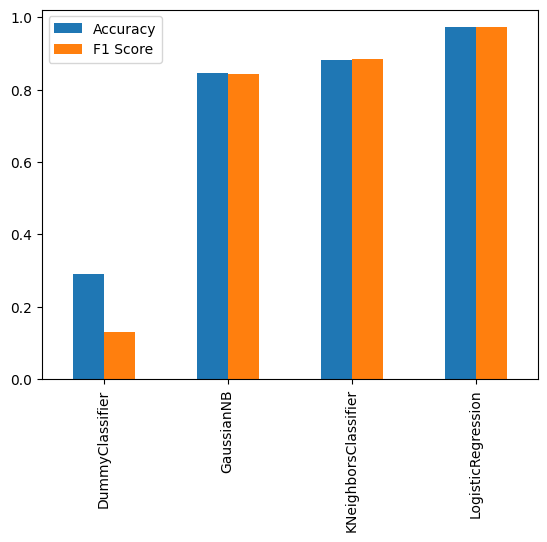

In [359]:
from IPython.display import Markdown as md



# display the results of the classifiers in a comparison bar plot
comparisonBarPlot = df.plot.bar()

# display the results of the classifiers in a markdown table
markDownTableResults = df.to_markdown()
md(markDownTableResults)



### Result analysis

- **Dummy classifier:** The dummy classifier does not perform well in neither metric. This is expected because the dataset is not balanced and the dummy classifier always predicts the most frequent class.

- **Gaussian Naive Bayes:** The Gaussian Naive Bayes classifier performs better than the dummy classifier in both metrics. This is expected because the dataset is not balanced and the Gaussian Naive Bayes classifier is a good classifier for imbalanced datasets.

- **k-nearest neighbors:** The k-nearest neighbors classifier performs better than the dummy classifier and has similar results to GNB in both metrics. 

- **Logistic Regression:** The Logistic Regression classifier performs slightly better than all the other classifier in both metrics.



#### Data preprocessing

- **Dataset balancing:** Since the dataset is not balanced, we decided to balance it by using a RandomOverSampler. This way we will have the same number of instances for each class, without losing any information. We chose this approach because we do not have a sufficient number of instances to use undersampling.





In [360]:
# oversample the minority class of the training set
from imblearn.over_sampling import RandomOverSampler

# define the oversampler
ros = RandomOverSampler()

# new training set after oversampling
X_train, y_train = ros.fit_resample(X_train, y_train)


- **Feature selection:** We decided to use the SelectKBest feature selection method. We used the chi2 function to calculate the chi-squared statistic between each feature and the class labels. We then selected the 10 features with the highest chi-squared statistic. We chose this approach because we wanted to select the features that are most correlated with the class labels. We also chose this approach because we wanted to reduce the number of features to improve the performance of the classifiers.

In [363]:
from sklearn.feature_selection import VarianceThreshold

# define the variance threshold
selector = VarianceThreshold()

X_train = selector.fit_transform(X_train)
print(X_train)
print(X_test)

[[ 3.  3.  3. ...  2.  0. 32.]
 [ 2.  2.  3. ...  2.  3. 25.]
 [ 2.  2.  1. ...  1.  0. 20.]
 ...
 [ 2.  2.  0. ...  2.  0. 22.]
 [ 1.  1.  0. ...  1.  0. 10.]
 [ 1.  1.  2. ...  2.  0.  7.]]
[[ 2.  2.  1. ...  2.  0. 22.]
 [ 3.  2.  0. ...  1.  0. 10.]
 [ 1.  1.  0. ...  2.  0. 25.]
 ...
 [ 2.  2.  1. ...  1.  0.  8.]
 [ 2.  2.  2. ...  3.  0. 48.]
 [ 1.  1.  0. ...  2.  0. 18.]]
